# COMUNICACIÓN DE RESULTADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa

pd.options.display.max_columns = None

# Conexión base de datos
con = sa.create_engine("sqlite:///Datos/airbnb.db")

df = pd.read_sql('df_preparado', con)

#Minicubo precio alquiler
metricas_alq = ['total_price', 'precio_compra']
dimensiones_alq = ['bedrooms_disc', 'beds_disc', 'accommodates_disc']

cubo_precio = df[metricas_alq + dimensiones_alq]

cubo_precio = cubo_precio.melt(id_vars = metricas_alq)
cubo_precio = cubo_precio.groupby(['variable', 'value'])[['total_price','precio_compra']].agg('median')

#Minicubo ocupacion
metricas_ocu = ['ocupacion']
dimensiones_ocu = ['bedrooms_disc', 'beds_disc', 'room_type']

cubo_ocupacion = df.loc[:, dimensiones_ocu + metricas_ocu]

cubo_ocupacion = cubo_ocupacion.melt(id_vars=['ocupacion'])
cubo_ocupacion = cubo_ocupacion.groupby(['variable', 'value'])[['ocupacion']].median()

## Contexto del análisis

La empresa ha seleccionado la ciudad de Madrid como candidata para buscar inmuebles en los que invertir con el objetivo de obtener rentabilidad mediante alquiler turístico.

Para ello, antes de poner al equipo de valoraciones a buscar oportunidades, la dirección ha encargado al equipo de Data Science un análisis de Discovery que permita identificar estrategias o líneas de trabajo que ayuden a dirigir la actuación del equipo de valoraciones.

## Objetivos

* Analizar las fuentes de datos públicas disponibles
* Para encontrar insights que ayuden a entender las características del mercado en esta ciudad
* Y guíen el trabajo de búsqueda del equipo de valoraciones
* Especialmente en cuanto a los principales ejes: precio del alquiler, niveles de ocupación y precio de compra

## Resumen ejecutivo

* Se han identificado 14 barrios como zonas prioritarias para la búsqueda de propiedades.

* Se recomienda centrarse en propiedades de 1 dormitorio para maximizar la eficiencia de ocupación.

* Se recomienda centrarse en propiedades con menos camas para maximizar las tasas de ocupación.

* Se recomienda buscar propiedades de un dormitorio con capacidad para 4 huéspedes.

* Se recomienda centrarse en habitaciones privadas para maximizar la ocupación y minimizar el riesgo de vacantes.

* Es aconsejable centrarse en propiedades situadas dentro de los barrios identificados, pero no necesariamente cerca de puntos de interés.

* Se recomienda evitar dar demasiada prioridad al tamaño de la propiedad como factor determinante de la ocupación.

* Se recomienda comprender que la competencia por sí sola no determina los resultados de ocupación, ni del precio del alquiler.

* Identificar oportunidades para formatos de alquiler impulsados por eventos, con San Blas-Canillejas como principal candidato.


## Detalles de los resultados principales

### Existen 14 barrios con alto potencial de inversión

Se han localizado 14 barrios que a priori pueden maximazar la relación coste-ingresos.

Podemos empezar a segmentar de la siguiente manera:

   - **Bajo**:  
      *Simancas, Ambroz, Marroquina, San Juan Bautista* - valores más bajos de compra y alquiler

   - **Medio:**  
   *El Plantio, Valdemarín, Valdefuentes* - valores medios
   - **Medio-alto:**  
   *Jerónimos, Fuentela reina* - precio de compra medio, alquiler elevado

   - **Alto:**  
   *Recoletos, Castellana, Goya* - precio de compra elevado, alquiler elevado 

 - **Potencialmentes rentables:**  
 *El Plantío, Rosas* - precio de compra bajo/medio, alquiler alto

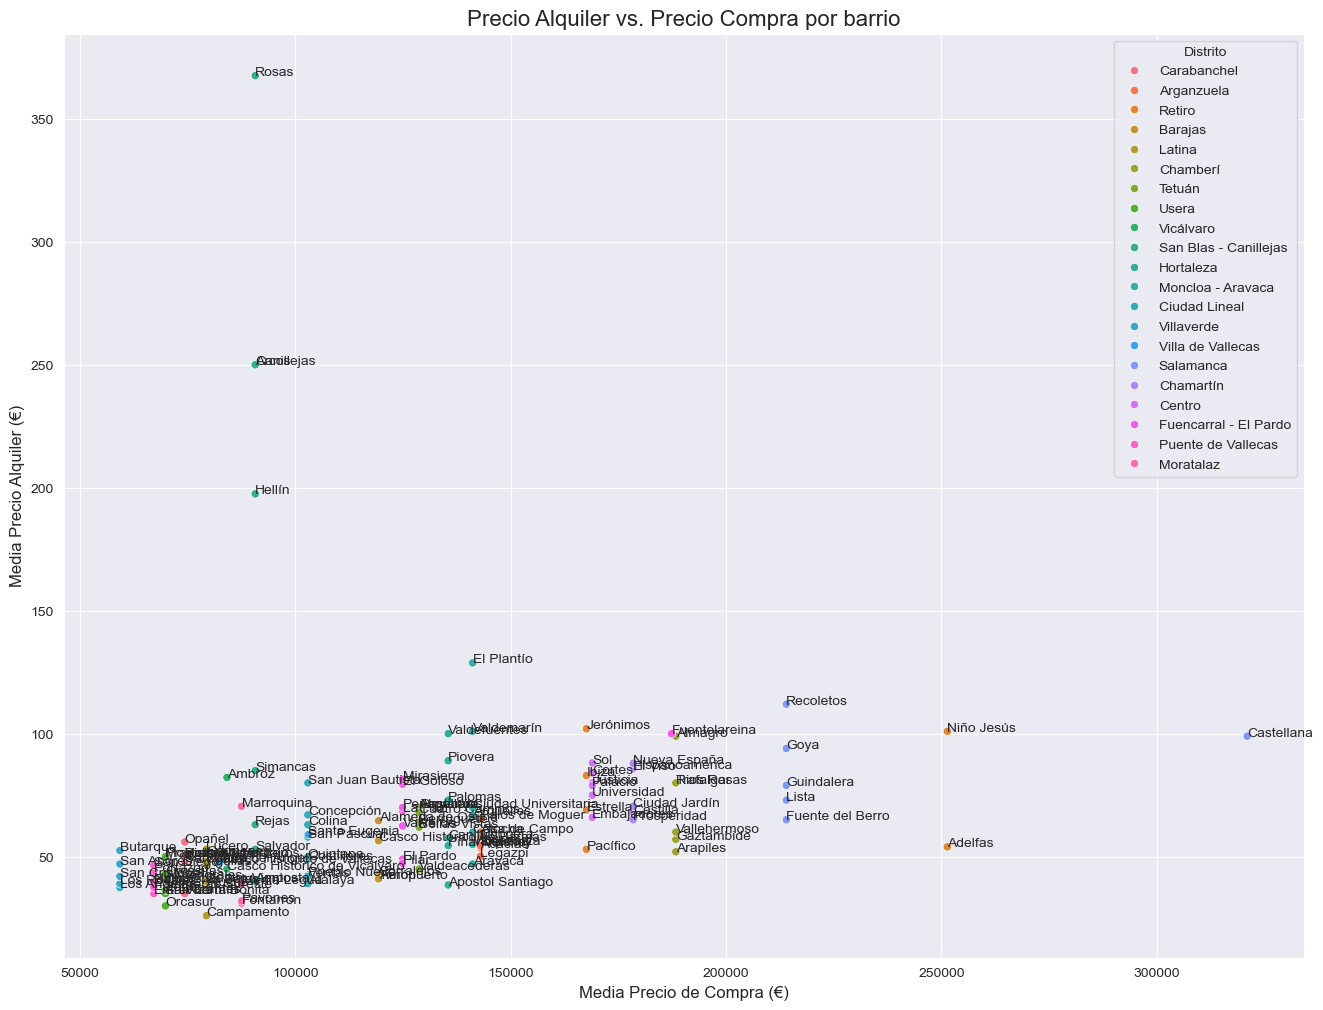

In [3]:
no_incluir = ['Rosas','Arcos','Canillejas','Hellín'] # Barrios de San Blas

temp = df.groupby(['neighbourhood','distrito'])[['total_price','precio_compra','ocupacion']].median()

temp = temp.reset_index()
temp = temp[~temp.index.isin(no_incluir)] # Excluimos los barrios de San Blas
temp = temp.set_index('neighbourhood')


# Visualización
# Opciones generales
plt.figure(figsize = (16,12))
sns.set_style('darkgrid')

# Gráfico y opciones
sns.scatterplot(data = temp, x = 'precio_compra', y = 'total_price', hue='distrito')

# Ponemos las etiquetas
for i in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[i], 
             temp.total_price.iloc[i], 
             temp.index[i]);
    
# Opciones Matplotlib
plt.legend(title='Distrito')

plt.title('Precio Alquiler vs. Precio Compra por barrio', fontsize=16)

plt.xlabel('Media Precio de Compra (€)', fontsize=12)
plt.ylabel('Media Precio Alquiler (€)', fontsize=12);

### Buscar propiedades de 1 habitaación para maximizar la eficiencia de la ocupación

* Los apartamentos de 1 dormitorio alcanzan las tasas de ocupación más altas, superando a todas las demás categorías.

* Esta tendencia pone de relieve una oportunidad estratégica para invertir en propiedades más pequeñas y de alta demanda, preferidas por viajeros solitarios y parejas.

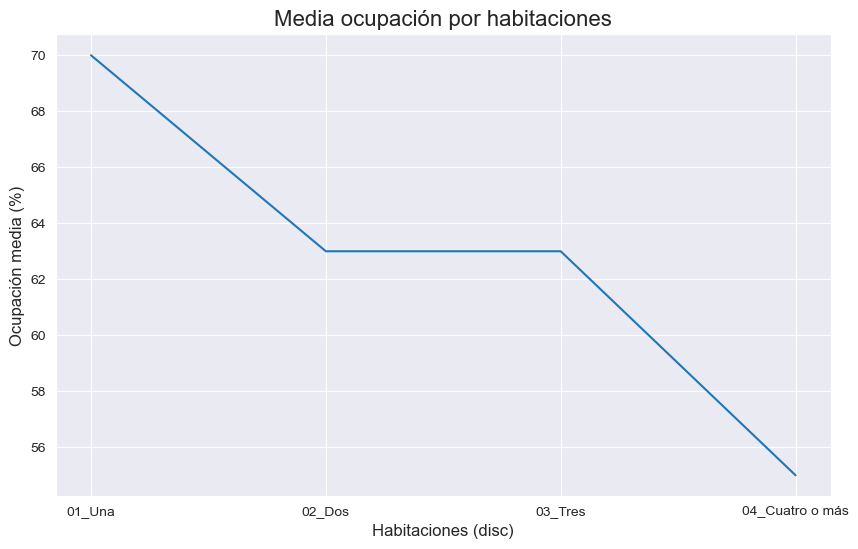

In [4]:
temp = cubo_ocupacion.loc['bedrooms_disc']

# Visualización
# Opciones generales
plt.figure(figsize = (10,6))
#sns.set_style('darkgrid')

# Gráfico y opciones
sns.lineplot(data = temp, x=temp.index, y ='ocupacion')

# Opciones Matplotlib
plt.title('Media ocupación por habitaciones', fontsize=16)

plt.xlabel('Habitaciones (disc)', fontsize=12)
plt.ylabel('Ocupación media (%)', fontsize=12);

### Buscar propiedades con menos camas para maximizar las tasas de ocupación.

* Las propiedades con 1 o 2 camas alcanzan la mayor ocupación, mientras que las propiedades con 4 o más camas caen drásticamente por debajo del 55 %.

* Añadir más camas no garantiza una mayor utilización, e incluso puede reducirla si se compromete la comodidad, la distribución o la flexibilidad de precios.

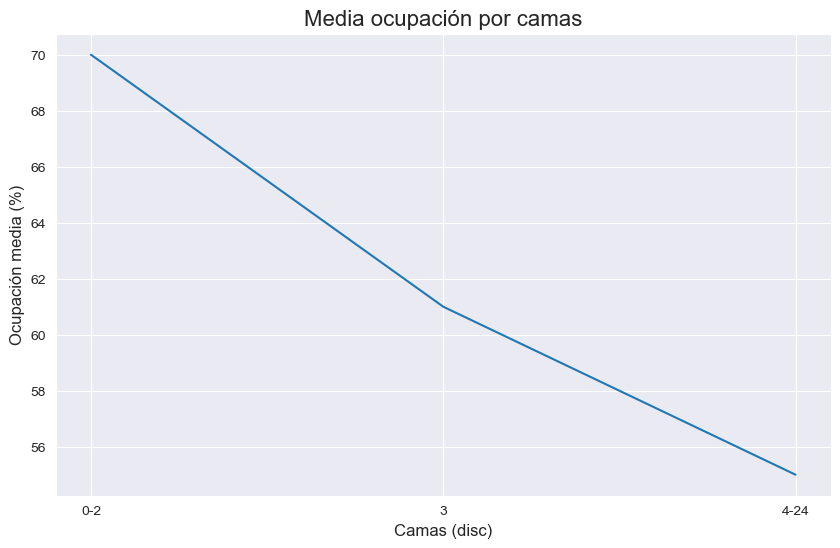

In [5]:
temp = cubo_ocupacion.loc['beds_disc']

# Visualización
# Opciones generales
plt.figure(figsize = (10,6))
#sns.set_style('darkgrid')

# Gráfico y opciones
sns.lineplot(data = temp, x=temp.index, y ='ocupacion')

# Opciones Matplotlib
plt.title('Media ocupación por camas', fontsize=16)

plt.xlabel('Camas (disc)', fontsize=12)
plt.ylabel('Ocupación media (%)', fontsize=12);

### Buscar propiedades de un dormitorio con capacidad para 4 huéspedes.

<Figure size 1000x600 with 0 Axes>

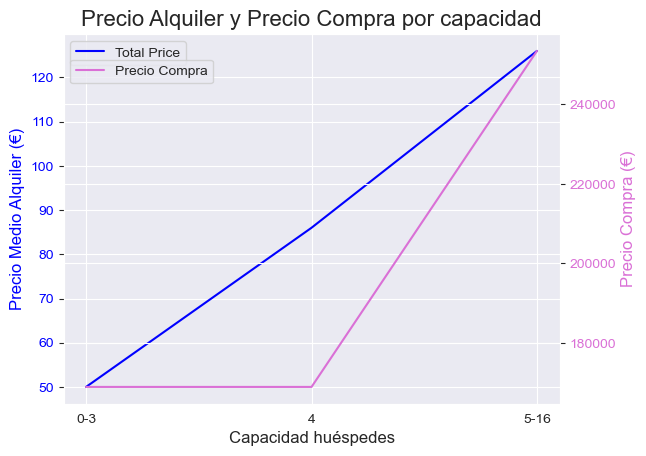

In [6]:
temp = cubo_precio.loc['accommodates_disc']


# Visualización

# Opciones generales
plt.figure(figsize=(10, 6))
#sns.set_style('darkgrid')

# Gráfico y opciones
fig, ax1 = plt.subplots()

# Primer eje: total_price
sns.lineplot(data=temp, x=temp.index, y=temp.total_price, ax=ax1, label='Total Price', color='blue')
ax1.set_ylabel('Precio Medio Alquiler (€)', fontsize=12, color='blue')
ax1.set_xlabel('Capacidad huéspedes', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Segundo eje: precio_compra
ax2 = ax1.twinx()
sns.lineplot(data=temp, x=temp.index, y=temp.precio_compra, ax=ax2, label='Precio Compra', color='orchid')
ax2.set_ylabel('Precio Compra (€)', fontsize=12, color='orchid')
ax2.tick_params(axis='y', labelcolor='orchid')

# Opciones Matplotlib
plt.title('Precio Alquiler y Precio Compra por capacidad', fontsize=16)
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95));

### Buscar habitaciones privadas para maximizar la ocupación y minimizar el riesgo de vacantes.

In [7]:
cubo_ocupacion.loc['room_type']

,ocupacion
value,
Entire home/apt,64.0
Private room,75.0
Shared room,29.0


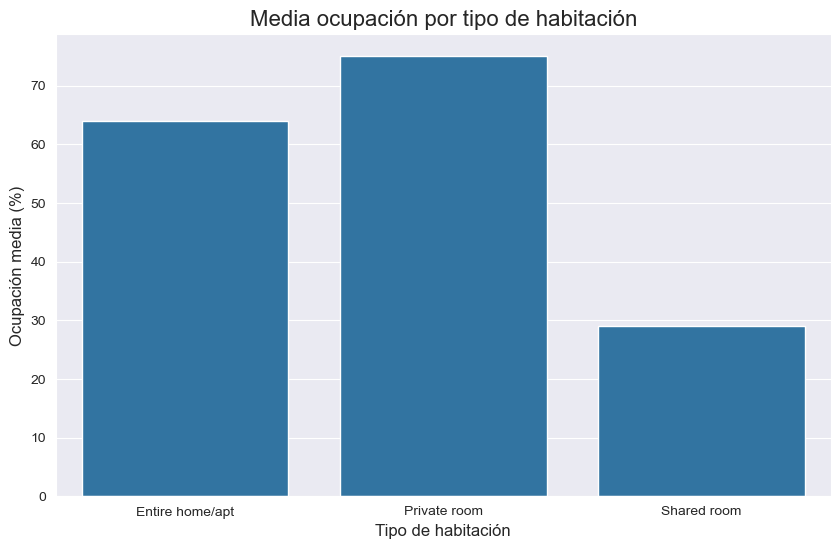

In [8]:
temp = cubo_ocupacion.loc['room_type']

# Visualización
# Opciones generales
plt.figure(figsize = (10,6))
#sns.set_style('darkgrid')

# Gráfico y opciones
sns.barplot(data = temp, x=temp.index, y ='ocupacion')

# Opciones Matplotlib
plt.title('Media ocupación por tipo de habitación', fontsize=16)

plt.xlabel('Tipo de habitación', fontsize=12)
plt.ylabel('Ocupación media (%)', fontsize=12);

### Buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés

* Previsiblemente tendrán menor precio de compra
* Parece que la cercanía a puntos de interés no tiene un especial impacto sobre el precio del alquiler, ni sobre la ocupación

In [9]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

df_seleccion = df.loc[df.distrito.isin(seleccion)].copy()

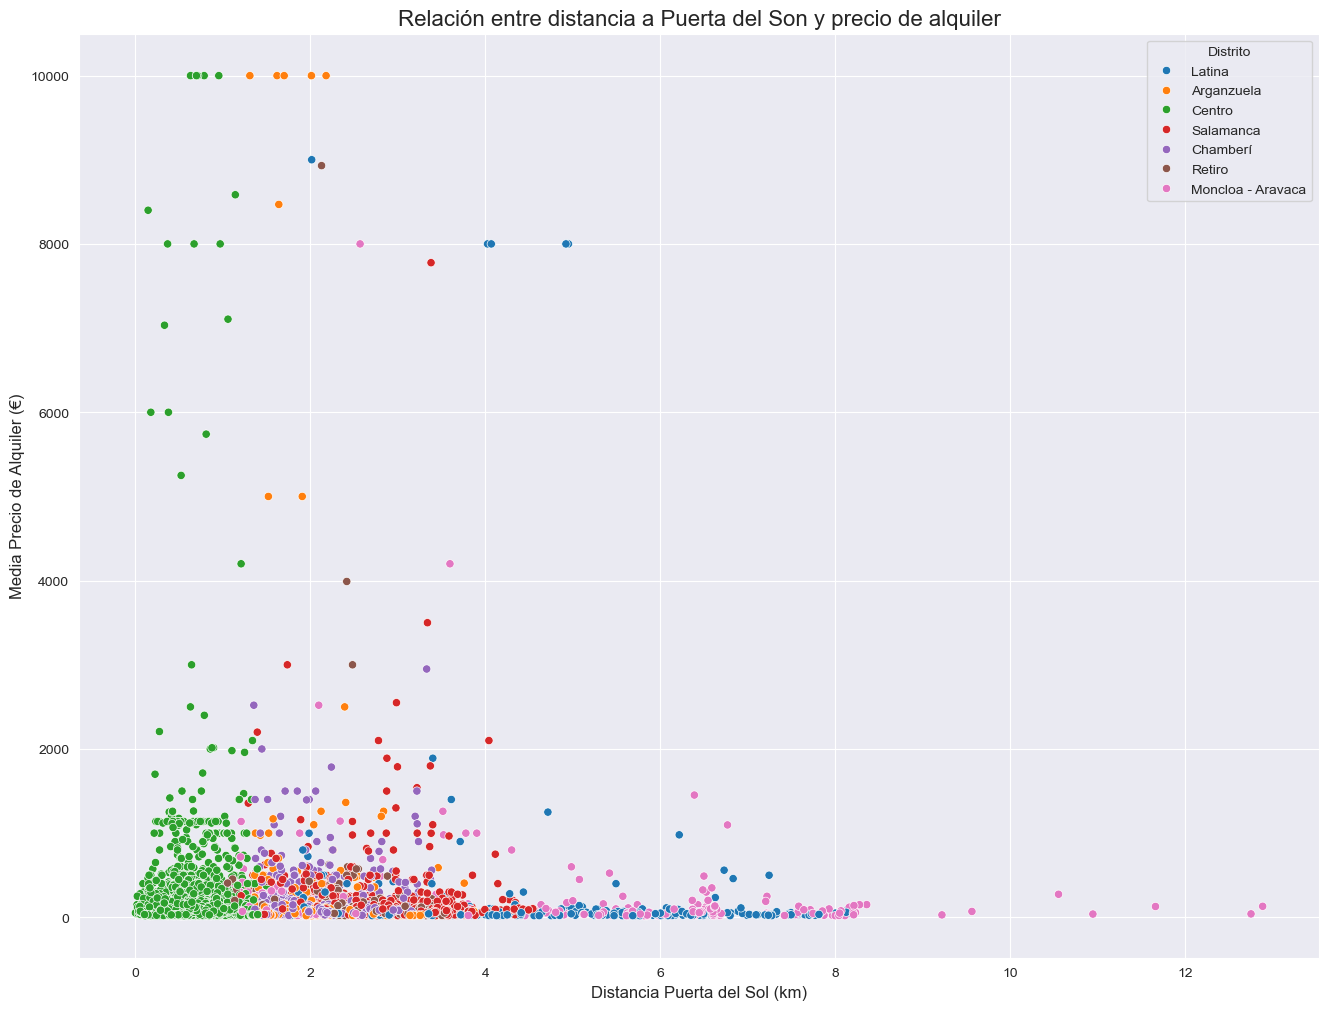

In [10]:
# Opciones generales
plt.figure(figsize=(16, 12))
#sns.set_style('darkgrid')

# Gráfico y opciones
sns.scatterplot(data=df_seleccion, x='pdi_sol', y='total_price', hue='distrito')

# Opciones Matplotlib
plt.legend(title='Distrito') # para hue

plt.title('Relación entre distancia a Puerta del Son y precio de alquiler', fontsize=16)

plt.xlabel('Distancia Puerta del Sol (km)', fontsize=12)
plt.ylabel('Media Precio de Alquiler (€)', fontsize=12);

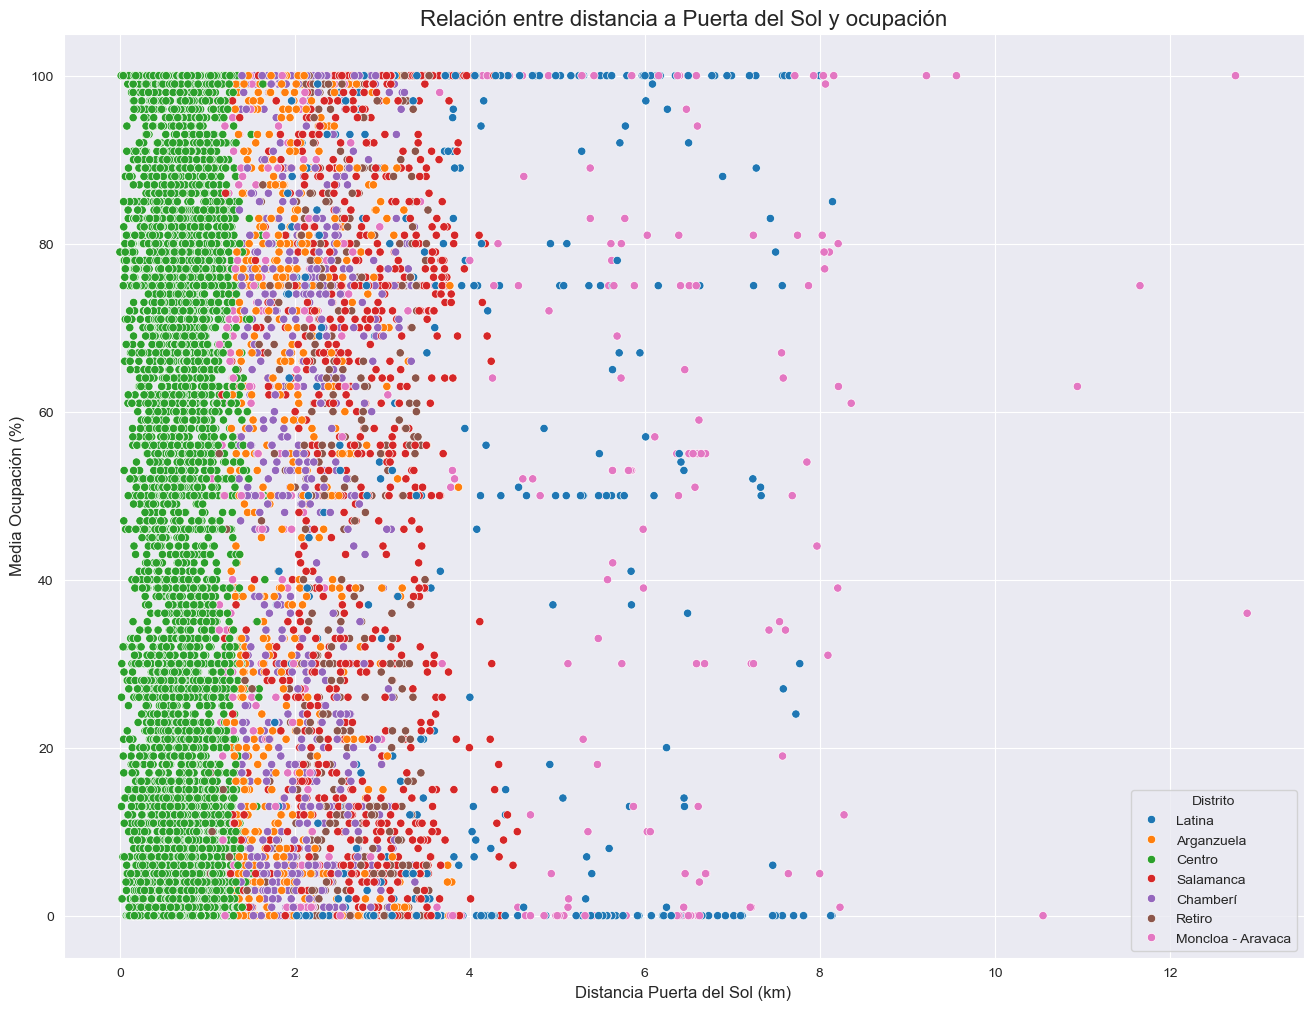

In [11]:
# Opciones generales
plt.figure(figsize=(16, 12))
#sns.set_style('darkgrid')

# Gráfico y opciones
sns.scatterplot(data=df_seleccion, x='pdi_sol', y='ocupacion', hue='distrito')

# Opciones Matplotlib
plt.legend(title='Distrito') # para hue

plt.title('Relación entre distancia a Puerta del Sol y ocupación', fontsize=16)

plt.xlabel('Distancia Puerta del Sol (km)', fontsize=12)
plt.ylabel('Media Ocupación (%)', fontsize=12);

In [12]:
seleccion

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

In [13]:
df_seleccion.distrito.unique()

array(['Latina', 'Arganzuela', 'Centro', 'Salamanca', 'Chamberí',
       'Retiro', 'Moncloa - Aravaca'], dtype=object)

### Evitar dar  prioridad al tamaño de la propiedad como factor determinante de la ocupación y precio de alquiler

* No existe una realción directa entre el tamaño del inmueble y la ocupación, ni con el precio del alquiler.

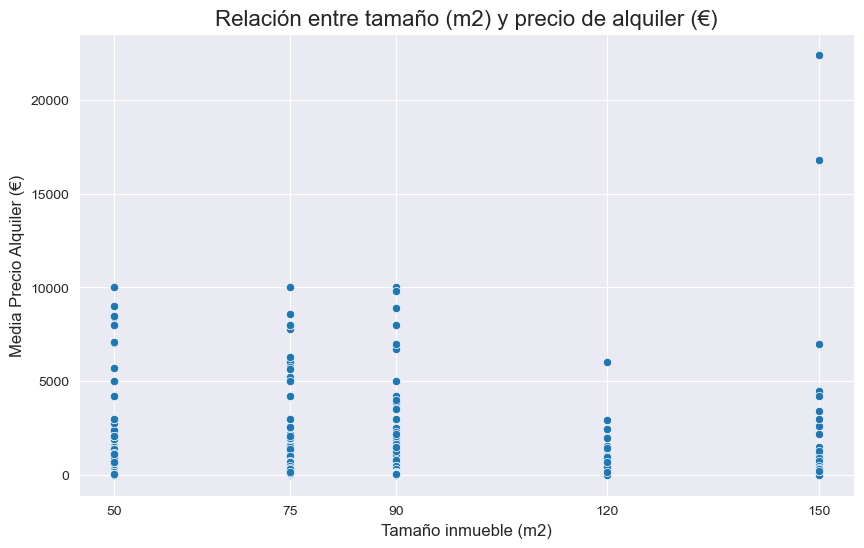

In [14]:
# Gráfico y opciones
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='m2', y='total_price' )

# Opciones Matplotlib
plt.xticks([50, 75, 90, 120, 150])

plt.title('Relación entre tamaño (m2) y precio de alquiler (€)', fontsize=16)

plt.xlabel('Tamaño inmueble (m2)', fontsize=12)
plt.ylabel('Media Precio Alquiler (€)', fontsize=12);

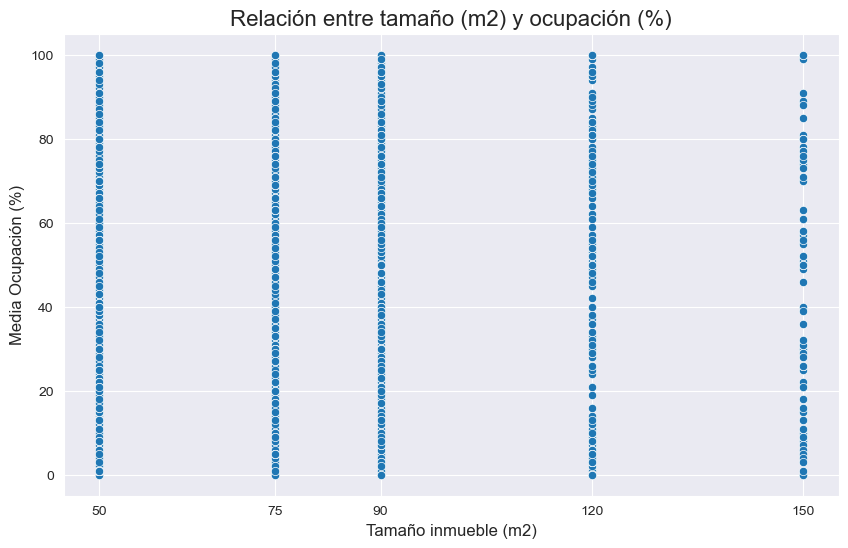

In [15]:
# Gráfico y opciones
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='m2', y='ocupacion' )

# Opciones Matplotlib
plt.xticks([50, 75, 90, 120, 150])

plt.title('Relación entre tamaño (m2) y ocupación (%)', fontsize=16)

plt.xlabel('Tamaño inmueble (m2)', fontsize=12)
plt.ylabel('Media Ocupación (%)', fontsize=12);

### La competencia no determina los resultados de ocupación, ni del precio del alquiler

* Una alta competencia no implica automáticamente una menor ocupación, ni un menor precio de alquiler.

* No existe una relación lineal clara entre la competencia y las tasas de ocupación o el precio del alquiler.

#### Competencia sobre la ocupación

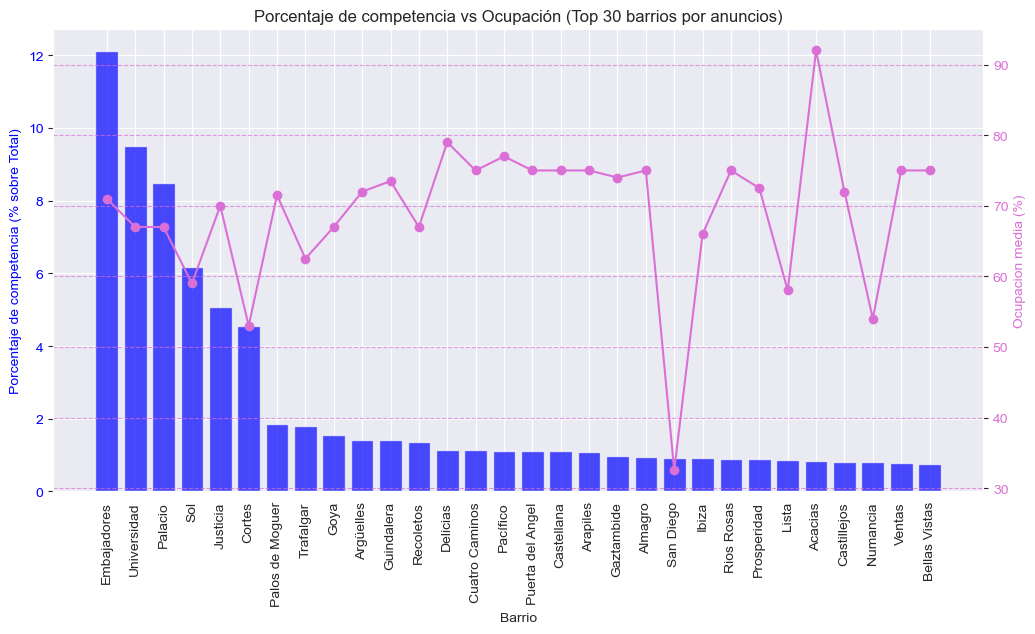

In [16]:
comp_ocu = df.groupby('neighbourhood').agg(
                            num_inmuebles = ('id', 'count'),
                            ocupacion_media =('ocupacion', 'median')
                        ).reset_index()

total_inmuebles = comp_ocu['num_inmuebles'].sum()

comp_ocu['porcentaje_competencia'] = 100 * (comp_ocu['num_inmuebles'] / total_inmuebles)

top_ocu = comp_ocu.sort_values(by = 'porcentaje_competencia', ascending=False).head(30)


# Visualización
# Opciones generales
fig, ax = plt.subplots(figsize=(12, 6))


# Gráfico principal y opciones
ax.bar(top_ocu['neighbourhood'],top_ocu['porcentaje_competencia'], color='blue', alpha=0.7)

ax.set_xticks(range(len(top_ocu['neighbourhood'])))
ax.set_xticklabels(top_ocu['neighbourhood'], rotation=90)
ax.set_xlabel('Barrio')

ax.tick_params(axis='y', labelcolor= 'blue')
ax.set_title('Porcentaje de competencia vs Ocupación (Top 30 barrios por anuncios)')
ax.set_ylabel('Porcentaje de competencia (% sobre Total)', color='blue')


# Segundo eje: ocupacion_media
ax2 = ax.twinx()

# Gráfico secundario y opciones
ax2.plot(top_ocu['neighbourhood'],top_ocu['ocupacion_media'], c='orchid', marker='o')
ax2.set_ylabel('Ocupacion media (%)', color='orchid')
ax2.tick_params(axis='y', labelcolor='orchid')



# Grid del eje secundario en color orchid
ax2.grid(True, axis='y', color='orchid', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.7)

#### Competencia sobre el precio del alquiler

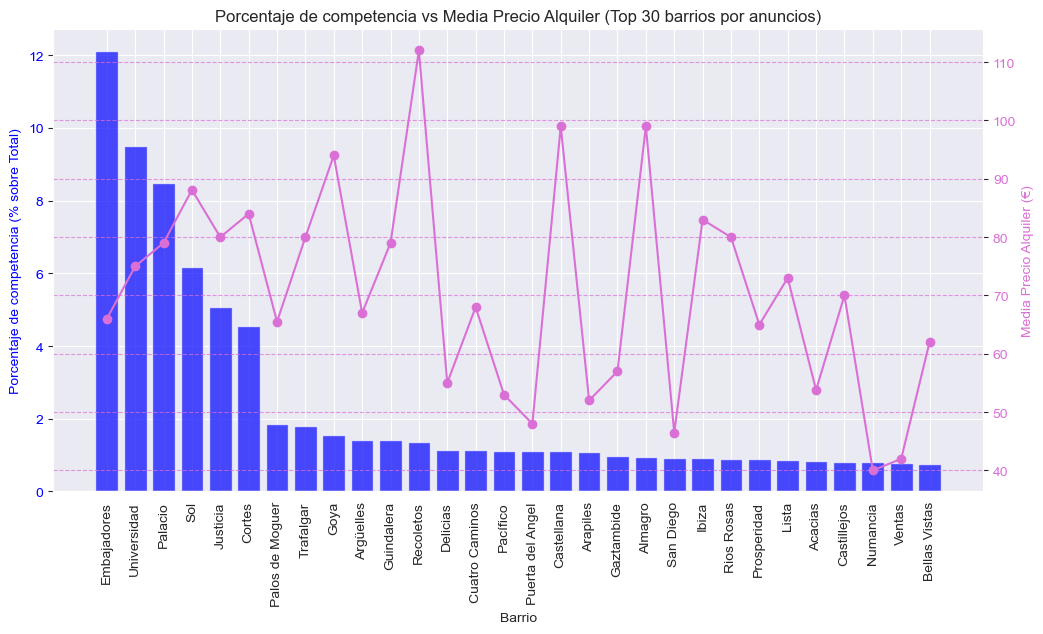

In [17]:
comp_alq = df.groupby('neighbourhood').agg(
                            num_inmuebles = ('id', 'count'),
                            media_precio_alquiler =('total_price', 'median')
                        ).reset_index()

total_listings = comp_alq.num_inmuebles.sum()
comp_alq['porcentaje_competencia'] = 100*comp_alq['num_inmuebles'] / total_listings

top_alq = comp_alq.sort_values(by='porcentaje_competencia',ascending=False).head(30)


# Visualización
# Opciones generales
fig, ax = plt.subplots(figsize=(12, 6))


# Gráfico principal y opciones
ax.bar(top_alq['neighbourhood'],top_alq['porcentaje_competencia'], color='blue', alpha=0.7)

ax.set_xticks(range(len(top_alq['neighbourhood'])))
ax.set_xticklabels(top_alq['neighbourhood'], rotation=90)
ax.set_xlabel('Barrio')

ax.tick_params(axis='y', labelcolor= 'blue')
ax.set_title('Porcentaje de competencia vs Media Precio Alquiler (Top 30 barrios por anuncios)')
ax.set_ylabel('Porcentaje de competencia (% sobre Total)', color='blue')


# Segundo eje: ocupacion_media
ax2 = ax.twinx()

# Gráfico secundario y opciones
ax2.plot(top_alq['neighbourhood'],top_alq['media_precio_alquiler'], c='orchid', marker='o')
ax2.set_ylabel('Media Precio Alquiler (€)', color='orchid')
ax2.tick_params(axis='y', labelcolor='orchid')



# Grid del eje secundario en color orchid
ax2.grid(True, axis='y', color='orchid', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.7)

### Evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés en eventos

* Buscar oportunidades en el barrio de San Blas
* Todavía existen muchos alquileres que no están explotando este potencial

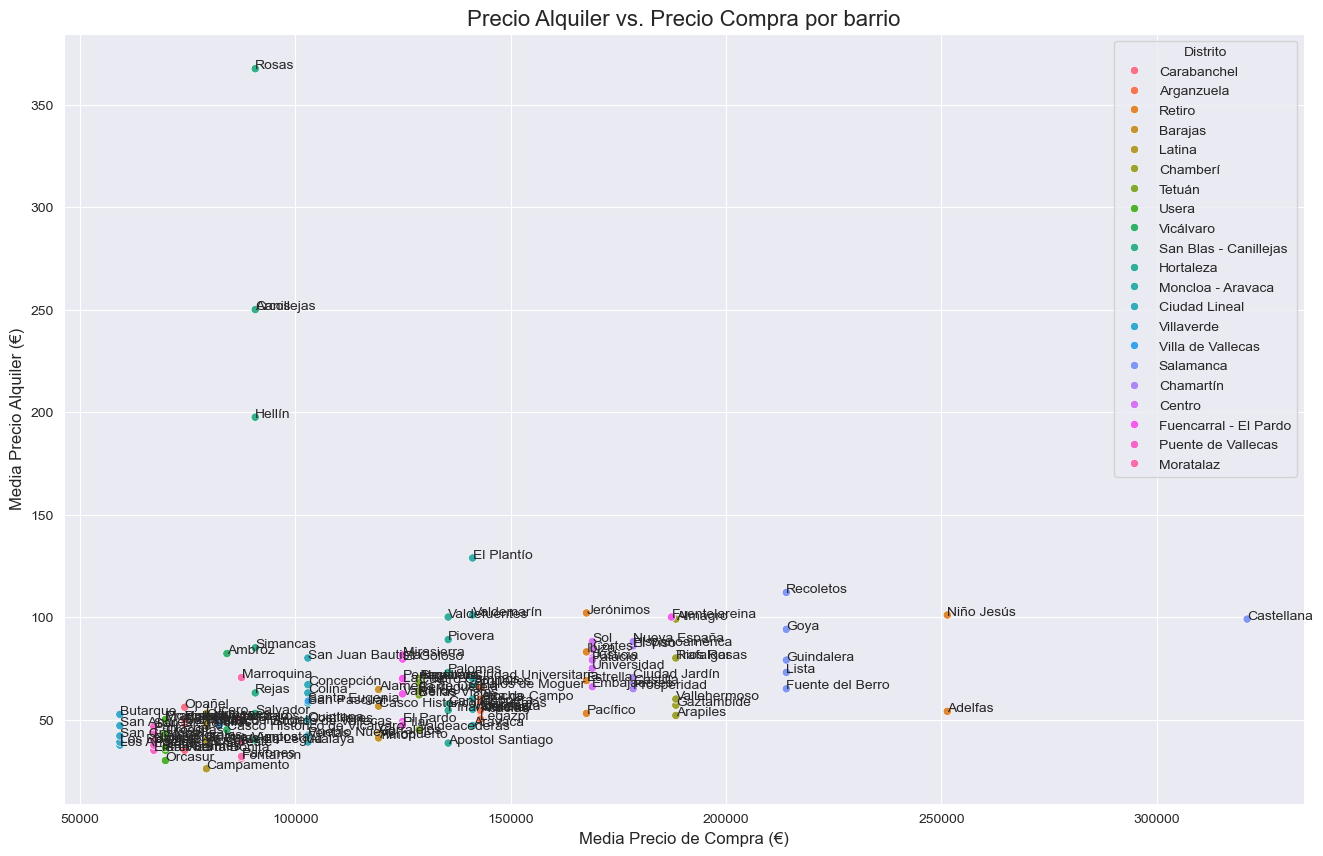

In [18]:
#no_incluir = ['Rosas','Arcos','Canillejas','Hellín'] # Barrios de San Blas

temp = df.groupby(['neighbourhood','distrito'])[['total_price','precio_compra','ocupacion']].median()

temp = temp.reset_index()
# temp = temp[~temp.index.isin(no_incluir)] # Excluimos los barrios de San Blas
temp = temp.set_index('neighbourhood')


# Visualización
# Opciones generales
plt.figure(figsize = (16,10))
sns.set_style('darkgrid')

# Gráfico y opciones
sns.scatterplot(data = temp, x = 'precio_compra', y = 'total_price', hue='distrito')

# Ponemos las etiquetas
for i in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[i], 
             temp.total_price.iloc[i], 
             temp.index[i]);
    
# Opciones Matplotlib
plt.legend(title='Distrito')

plt.title('Precio Alquiler vs. Precio Compra por barrio', fontsize=16)

plt.xlabel('Media Precio de Compra (€)', fontsize=12)
plt.ylabel('Media Precio Alquiler (€)', fontsize=12);

In [19]:
import folium

datos = df[df.distrito == 'San Blas - Canillejas'].copy()

datos['precio_total_disc'] = pd.qcut(datos['total_price'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

mapa = folium.Map(location=[datos.iloc[0,7], datos.iloc[0,8]],zoom_start=14)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['total_price'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

#mapa.save("mapa_San_Blas_COMUNICACION.html")
mapa